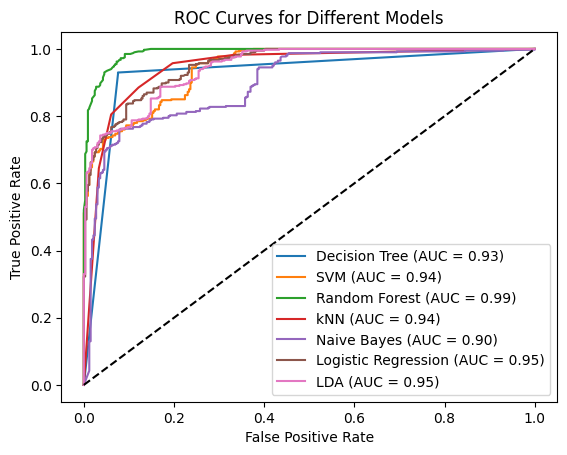

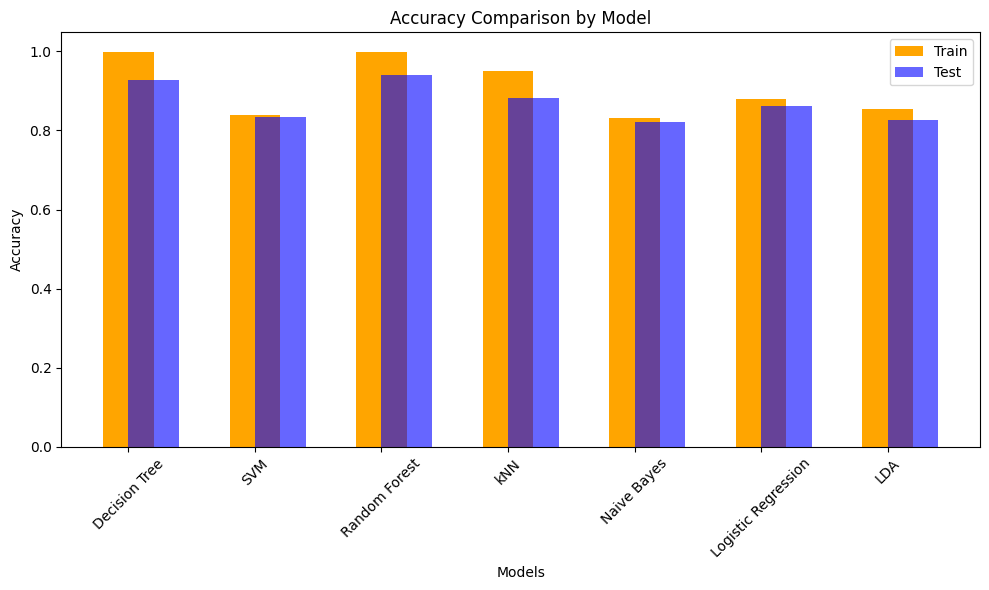

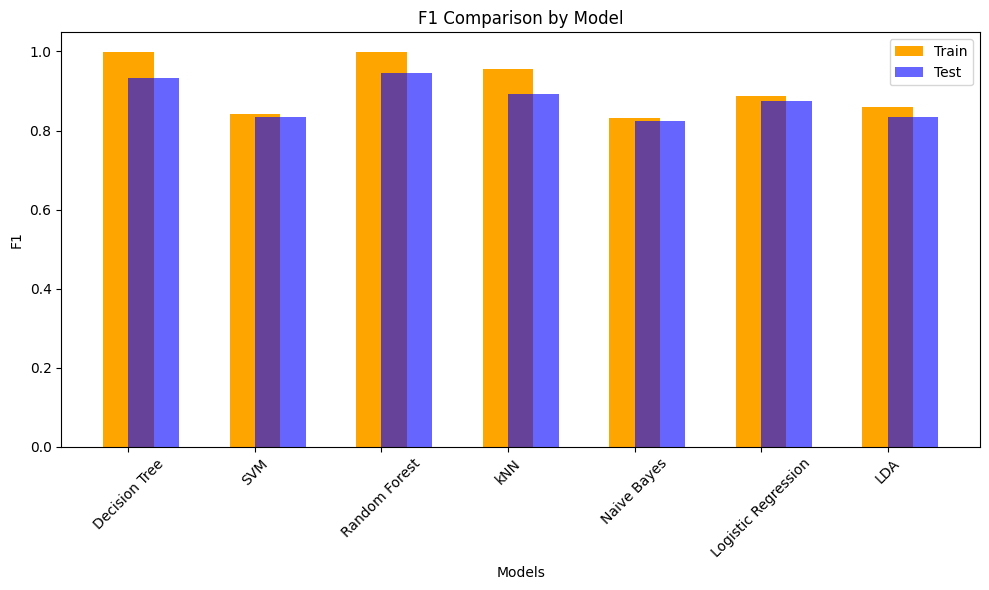

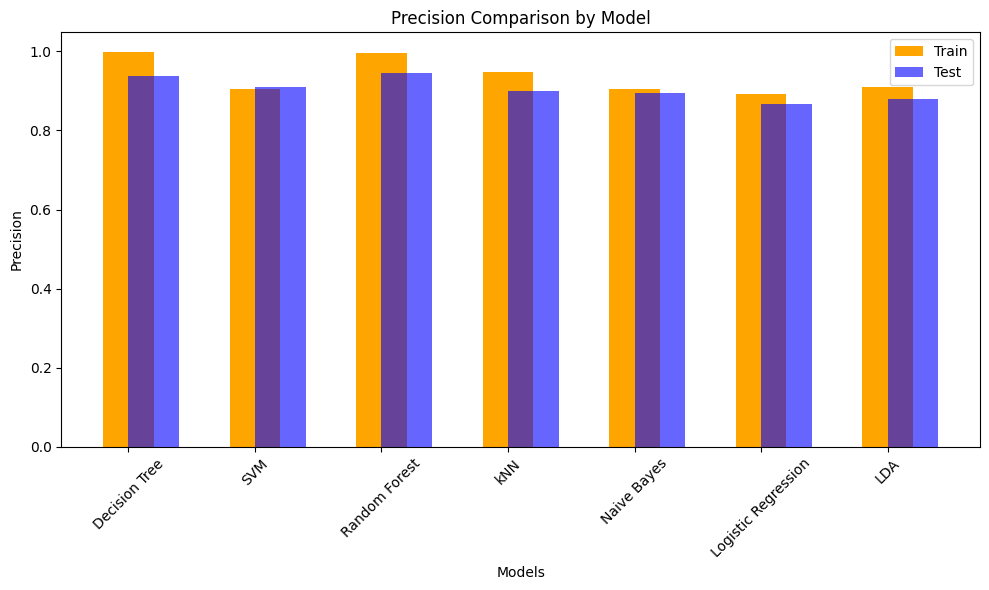

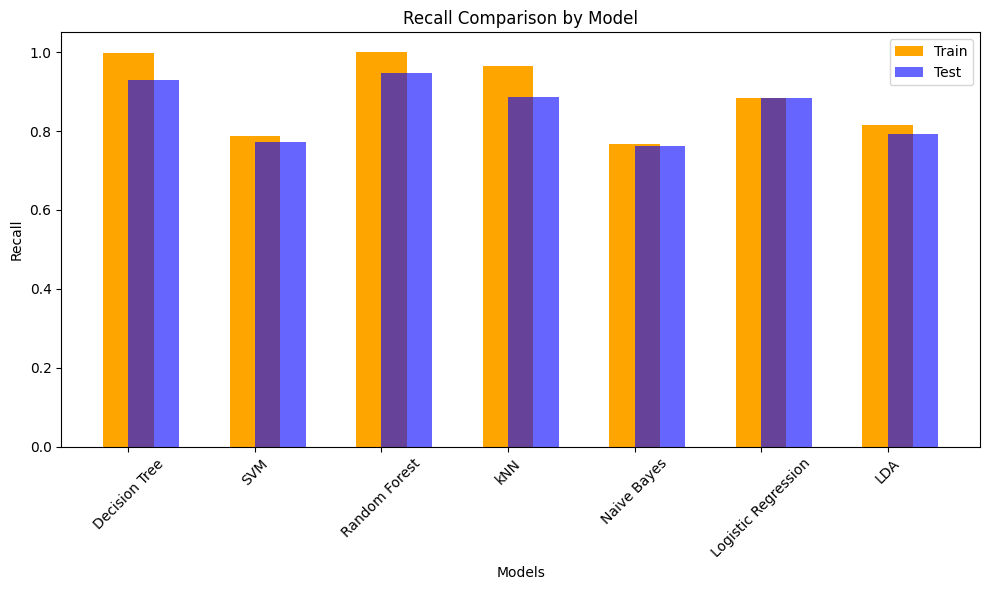

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load data
df = pd.read_csv('data_to_model.csv')

# Split data into features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Convert to NumPy array if not already
X = np.array(X)
y = np.array(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "kNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "LDA": LinearDiscriminantAnalysis()
}

# Store metrics
metrics = {
    "Model": [],
    "Train Accuracy": [],
    "Test Accuracy": [],
    "Train F1": [],
    "Test F1": [],
    "Train Precision": [],
    "Test Precision": [],
    "Train Recall": [],
    "Test Recall": [],
    "ROC AUC": []
}

# Function to calculate metrics
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_test_prob = model.predict_proba(X_test)[:, 1]
    
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    train_precision = precision_score(y_train, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)
    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)
    fpr, tpr, _ = roc_curve(y_test, y_test_prob)
    roc_auc = auc(fpr, tpr)

    return train_acc, test_acc, train_f1, test_f1, train_precision, test_precision, train_recall, test_recall, roc_auc, fpr, tpr

# Evaluate models and store metrics
for name, model in models.items():
    results = evaluate_model(model, X_train, y_train, X_test, y_test)
    metrics["Model"].append(name)
    metrics["Train Accuracy"].append(results[0])
    metrics["Test Accuracy"].append(results[1])
    metrics["Train F1"].append(results[2])
    metrics["Test F1"].append(results[3])
    metrics["Train Precision"].append(results[4])
    metrics["Test Precision"].append(results[5])
    metrics["Train Recall"].append(results[6])
    metrics["Test Recall"].append(results[7])
    metrics["ROC AUC"].append(results[8])

    # Plot ROC Curve for each model
    plt.plot(results[9], results[10], label=f'{name} (AUC = {results[8]:.2f})')

# Plotting ROC Curves
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc="lower right")
plt.show()

# Plotting bar charts
metrics_df = pd.DataFrame(metrics)
for metric in ["Accuracy", "F1", "Precision", "Recall"]:
    plt.figure(figsize=(10, 6))
    # Plotting training metrics
    plt.bar(metrics_df["Model"], metrics_df[f"Train {metric}"], color='orange', width=0.4, label='Train', align='center')
    # Plotting testing metrics
    plt.bar(metrics_df["Model"], metrics_df[f"Test {metric}"], color='blue', width=0.4, label='Test', alpha=0.6, align='edge')
    plt.xlabel('Models')
    plt.ylabel(metric)
    plt.title(f'{metric} Comparison by Model')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Save metrics to a CSV file
metrics_df.to_csv('model_performance_metrics.csv', index=False)
